# Explore the Dataset


define the dataset location

load and summarize the dataset


In [ ]:
from pandas import read_csv
from collections import Counter
# create histograms of input variables
from pandas import read_csv
from matplotlib import pyplot
#Dummy classifier
from sklearn.dummy import DummyClassifier
# test harness and baseline model evaluation for the credit dataset
from collections import Counter
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyClassifier
# spot check machine learning algorithms on the credit card fraud dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
# fit a model and make predictions for the on the credit card fraud dataset
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline



In [58]:
filename = 'creditcard.csv'
# load the csv file as a data frame
dataframe = read_csv(filename, header=None)

In [59]:
# summarize the shape of the dataset
print(dataframe.shape)

(284807, 31)


In [60]:
# summarize the class distribution
target = dataframe.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=0, Count=284315, Percentage=99.827%
Class=1, Count=492, Percentage=0.173%


The complete example of creating histograms of all input variables is listed below.



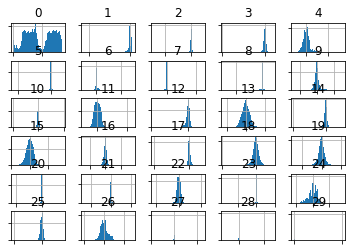

In [61]:
# define the dataset location
filename = 'creditcard.csv'
# load the csv file as a data frame
df = read_csv(filename, header=None)
# drop the target variable
df = df.drop(30, axis=1)
# create a histogram plot of each numeric variable
ax = df.hist(bins=100)
# disable axis labels to avoid the clutter
for axis in ax.flatten():
	axis.set_xticklabels([])
	axis.set_yticklabels([])
# show the plot
pyplot.show()


The amount variable might be interesting and does not appear on the histogram.

This suggests that the distribution of the amount values may be skewed. We can create a 5-number summary of this variable to get a better idea of the transaction sizes.

The complete example is listed below.

In [62]:
# load the csv file as a data frame
df = read_csv(filename, header=None)
# summarize the amount variable.
print(df[29].describe())

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: 29, dtype: float64


# Model Test and Baseline Result


In [63]:
# load the dataset
def load_dataset(full_path):
	# load the dataset as a numpy array
	data = read_csv(full_path, header=None)
	# retrieve numpy array
	data = data.values
	# split into input and output elements
	X, y = data[:, :-1], data[:, -1]
	return X, y

This involves first calculating the precision-recall curve for the predictions via the precision_recall_curve() function. The output recall and precision values for each threshold can then be provided as arguments to the auc() to calculate the area under the curve. The pr_auc() function below implements this.



In [64]:
# calculate precision-recall area under curve
def pr_auc(y_true, probas_pred):
	# calculate precision-recall curve
	p, r, _ = precision_recall_curve(y_true, probas_pred)
	# calculate area under curve
	return auc(r, p)

We can then define a function that will evaluate a given model on the dataset and return a list of PR AUC scores for each fold and repeat.


The evaluate_model() function below implements this, taking the dataset and model as arguments and returning the list of scores. The make_scorer() function is used to define the precision-recall AUC metric and indicates that a model must predict probabilities in order to be evaluated.


In [65]:
# evaluate a model
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# define the model evaluation the metric
	metric = make_scorer(pr_auc, needs_proba=True)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
	return scores

Finally, we can evaluate a baseline model on the dataset using this test harness.

A model that predicts the positive class (class 1) for all examples will provide a baseline performance when using the precision-recall area under curve metric.

This can be achieved using the DummyClassifier class from the scikit-learn library and setting the “strategy” argument to ‘constant‘ and setting the “constant” argument to ‘1’ to predict the positive class.

Once the model is evaluated, we can report the mean and standard deviation of the PR AUC scores directly.

In [66]:
# define the location of the dataset
full_path = 'creditcard.csv'
# load the dataset
X, y = load_dataset(full_path)
# summarize the loaded dataset
print(X.shape, y.shape, Counter(y))
# define the reference model
model = DummyClassifier(strategy='constant', constant=1)
# evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean PR AUC: %.3f (%.3f)' % (mean(scores), std(scores)))

(284807, 30) (284807,) Counter({0.0: 284315, 1.0: 492})
Mean PR AUC: 0.501 (0.000)


We can see that we have the correct number of rows loaded and that we have 30 input variables.

Next, the average of the PR AUC scores is reported.

In this case, we can see that the baseline algorithm achieves a mean PR AUC of about 0.501.

This score provides a lower limit on model skill; any model that achieves an average PR AUC above about 0.5 has skill, whereas models that achieve a score below this value do not have skill on this dataset.

# Evaluate Models


In this section, we will evaluate a suite of different techniques on the dataset using the test harness developed in the previous section.

The goal is to both demonstrate how to work through the problem systematically and to demonstrate the capability of some techniques designed for imbalanced classification problems.

The reported performance is good but not highly optimized (e.g. hyperparameters are not tuned).

Can you do better? If you can achieve better PR AUC performance using the same test harness

# Evaluate Machine Learning Algorithms


We will evaluate the following machine learning models on the credit card fraud dataset:

Decision Tree (CART)

k-Nearest Neighbors (KNN)

Bagged Decision Trees (BAG)

Random Forest (RF)

Extra Trees (ET)

We will define each model in turn and add them to a list so that we can evaluate them sequentially. The get_models() function below defines the list of models for evaluation, as well as a list of model short names for plotting the results later.

In [67]:
# define models to test
def get_models():
	models, names = list(), list()
	# CART
	models.append(DecisionTreeClassifier())
	names.append('CART')
	# KNN
	steps = [('s',StandardScaler()),('m',KNeighborsClassifier())]
	models.append(Pipeline(steps=steps))
	names.append('KNN')
	# Bagging
	models.append(BaggingClassifier(n_estimators=100))
	names.append('BAG')
	# RF
	models.append(RandomForestClassifier(n_estimators=100))
	names.append('RF')
	# ET
	models.append(ExtraTreesClassifier(n_estimators=100))
	names.append('ET')
	return models, names

We can then enumerate the list of models in turn and evaluate each, storing the scores for later evaluation.

In [ ]:
# define models
models, names = get_models()
results = list()
# evaluate each model
for i in range(len(models)):
	# evaluate the model and store results
	scores = evaluate_model(X, y, models[i])
	results.append(scores)
	# summarize performance
	print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

At the end of the run, we can plot each sample of scores as a box and whisker plot with the same scale so that we can directly compare the distributions.



Running the example evaluates each algorithm in turn and reports the mean and standard deviation PR AUC.

Your specific results will vary given the stochastic nature of the learning algorithms; consider running the example a few times.

In this case, we can see that all of the tested algorithms have skill, achieving a PR AUC above the default of 0.5. The results suggest that the ensembles of decision tree algorithms all do well on this dataset, although the KNN with standardization of the dataset seems to perform the best on average.

In [ ]:
# plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

A figure is created showing one box and whisker plot for each algorithm’s sample of results. The box shows the middle 50 percent of the data, the orange line in the middle of each box shows the median of the sample, and the green triangle in each box shows the mean of the sample.

We can see that the distributions of scores for the KNN and ensembles of decision trees are tight and means seem to coincide with medians, suggesting the distributions may be symmetrical and are probably Gaussian and that the scores are probably quite stable.

# Make Prediction on New Data


We will use the KNN model as our final model that achieved a PR AUC of about 0.867. Fitting the final model involves defining a Pipeline to scale the numerical variables prior to fitting the model.

First, we can define the model as a pipeline.



In [ ]:
# define model to evaluate
model = KNeighborsClassifier()
# scale, then fit model
pipeline = Pipeline(steps=[('s',StandardScaler()), ('m',model)])

In [ ]:
# fit the model
pipeline.fit(X, y)

Once fit, we can use it to make predictions for new data by calling the predict_proba() function. This will return the probability for each class.

We can retrieve the predicted probability for the positive class that a operator of the model might use to interpret the prediction.

In [ ]:
# evaluate on some normal cases (known class 0)
print('Normal cases:')
data = [[0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62],
	[0,1.19185711131486,0.26615071205963,0.16648011335321,0.448154078460911,0.0600176492822243,-0.0823608088155687,-0.0788029833323113,0.0851016549148104,-0.255425128109186,-0.166974414004614,1.61272666105479,1.06523531137287,0.48909501589608,-0.143772296441519,0.635558093258208,0.463917041022171,-0.114804663102346,-0.183361270123994,-0.145783041325259,-0.0690831352230203,-0.225775248033138,-0.638671952771851,0.101288021253234,-0.339846475529127,0.167170404418143,0.125894532368176,-0.00898309914322813,0.0147241691924927,2.69],
	[1,-1.35835406159823,-1.34016307473609,1.77320934263119,0.379779593034328,-0.503198133318193,1.80049938079263,0.791460956450422,0.247675786588991,-1.51465432260583,0.207642865216696,0.624501459424895,0.066083685268831,0.717292731410831,-0.165945922763554,2.34586494901581,-2.89008319444231,1.10996937869599,-0.121359313195888,-2.26185709530414,0.524979725224404,0.247998153469754,0.771679401917229,0.909412262347719,-0.689280956490685,-0.327641833735251,-0.139096571514147,-0.0553527940384261,-0.0597518405929204,378.66]]
for row in data:
	# make prediction
	yhat = pipeline.predict_proba([row])
	# get the probability for the positive class
	result = yhat[0][1]
	# summarize
	print('>Predicted=%.3f (expected 0)' % (result))
# evaluate on some fraud cases (known class 1)
print('Fraud cases:')
data = [[406,-2.3122265423263,1.95199201064158,-1.60985073229769,3.9979055875468,-0.522187864667764,-1.42654531920595,-2.53738730624579,1.39165724829804,-2.77008927719433,-2.77227214465915,3.20203320709635,-2.89990738849473,-0.595221881324605,-4.28925378244217,0.389724120274487,-1.14074717980657,-2.83005567450437,-0.0168224681808257,0.416955705037907,0.126910559061474,0.517232370861764,-0.0350493686052974,-0.465211076182388,0.320198198514526,0.0445191674731724,0.177839798284401,0.261145002567677,-0.143275874698919,0],
	[7519,1.23423504613468,3.0197404207034,-4.30459688479665,4.73279513041887,3.62420083055386,-1.35774566315358,1.71344498787235,-0.496358487073991,-1.28285782036322,-2.44746925511151,2.10134386504854,-4.6096283906446,1.46437762476188,-6.07933719308005,-0.339237372732577,2.58185095378146,6.73938438478335,3.04249317830411,-2.72185312222835,0.00906083639534526,-0.37906830709218,-0.704181032215427,-0.656804756348389,-1.63265295692929,1.48890144838237,0.566797273468934,-0.0100162234965625,0.146792734916988,1],
	[7526,0.00843036489558254,4.13783683497998,-6.24069657194744,6.6757321631344,0.768307024571449,-3.35305954788994,-1.63173467271809,0.15461244822474,-2.79589246446281,-6.18789062970647,5.66439470857116,-9.85448482287037,-0.306166658250084,-10.6911962118171,-0.638498192673322,-2.04197379107768,-1.12905587703585,0.116452521226364,-1.93466573889727,0.488378221134715,0.36451420978479,-0.608057133838703,-0.539527941820093,0.128939982991813,1.48848121006868,0.50796267782385,0.735821636119662,0.513573740679437,1]]
for row in data:
	# make prediction
	yhat = pipeline.predict_proba([row])
	# get the probability for the positive class
	result = yhat[0][1]
	# summarize
	print('>Predicted=%.3f (expected 1)' % (result))

Then the fit model is used to predict the label of normal cases chosen from the dataset file. We can see that all cases are correctly predicted.

Then some fraud cases are used as input to the model and the label is predicted. As we might have hoped, most of the examples are predicted correctly with the default threshold. This highlights the need for a user of the model to select an appropriate probability threshold.

# Summary


develop and evaluate a model for the imbalanced credit card fraud classification dataset.

In [ ]:
load and explore the dataset and generate ideas for data preparation and model selection.

systematically evaluate a suite of machine learning models with a robust test harness.

 fit a final model and use it to predict the probability of fraud for specific cases.
    